# **Desafio IHM Stefanini - 02 - Tendência e Sazonalidade**

## **Carregando as bibliotecas**

In [1]:
import numpy as np
import pandas as pd
import pymannkendall as mk
import math
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

## **Configurações do notebook**

In [2]:
%matplotlib inline
sns.set(style='white')
pd.set_option('display.max_columns', None) # Apenas se precisar

## **Carregando os dados**

In [3]:
df = pd.read_csv("dados_ihm_stefanini/flotation_hour.csv")

In [4]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S")

## **Análise de Tendência**

### **Teste de Mann-Kendall**

O teste de Mann-Kendall serve para determinar se existe tendência ou um conjunto de dados de dérie temporal. É um teste não-paramétrico, ou seja, não há nenhuma suposição oculta feita sobre a normalidade dos dados.

As hipóteses do teste são:
- **H0 (hipótese nula)**: não há tendência presente nos dados.
- **H1 (hipótese alternativa)**: há tendência presente nos dados, podendo ser negativa ou positiva.

Se o valor p do teste é menor que o nível de significância alfa (valores mais comuns de significância: 0.10, 0.05 e 0.01), então estatisticamente há evidência significativa de que há tendência presente no conjunto de dados.

**Fazendo o teste de Mann-Kendall para a coluna `% Silica Concentrate`:**

In [5]:
print(mk.original_test(df['% Silica Concentrate'], alpha=0.05))

Mann_Kendall_Test(trend='decreasing', h=True, p=0.0, z=-9.9518778452237, Tau=-0.09988839176900842, s=-973303.0, var_s=9565004052.333334, slope=-0.00011074683371387303, intercept=2.2944182620065177)


**Avaliando a tendência por gráfico:**

In [6]:
np.arange(5)

array([0, 1, 2, 3, 4])

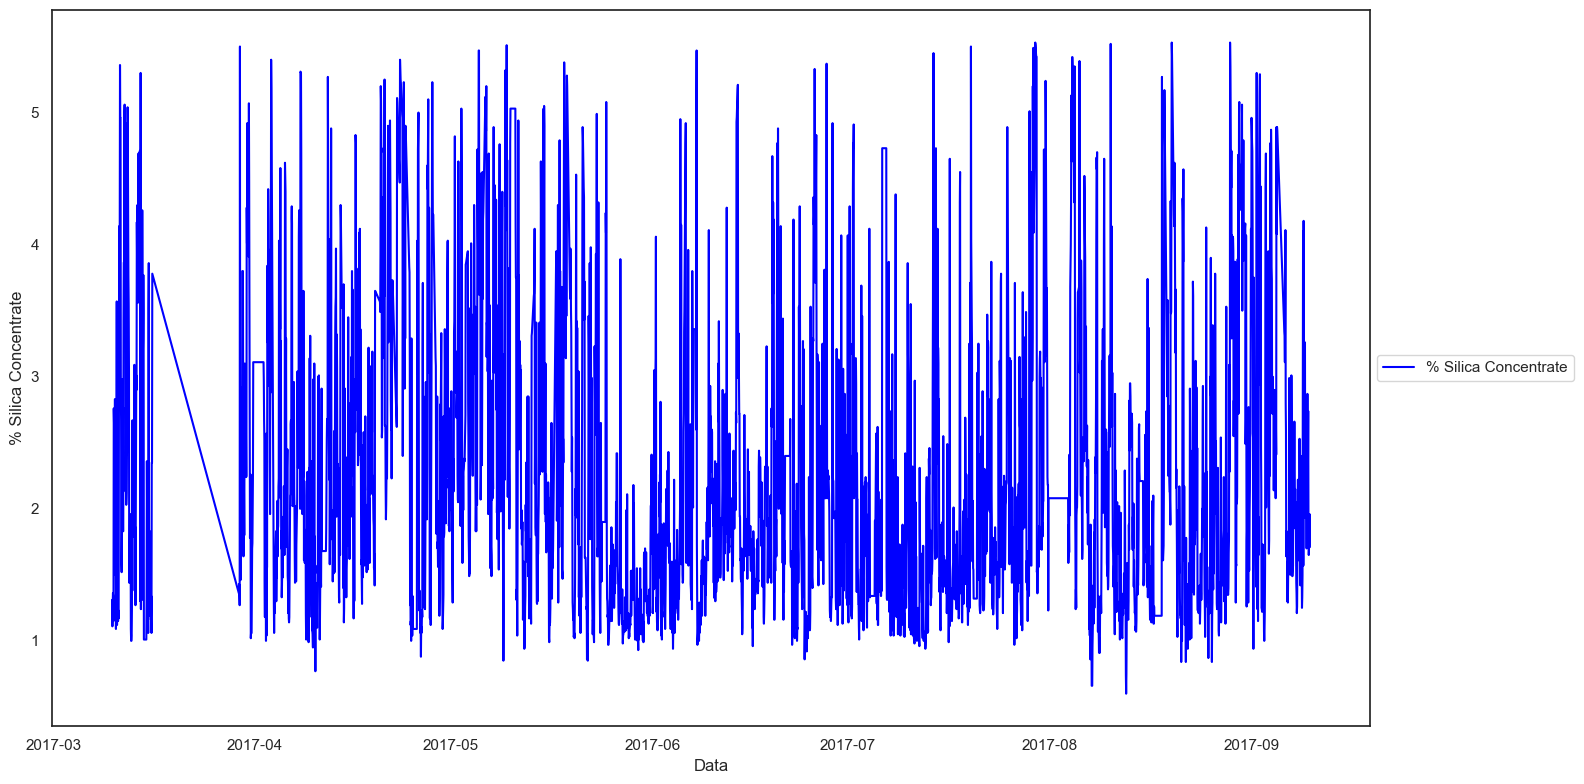

In [7]:
fig, ax = plt.subplots(figsize=(16,8))

plt.plot(df['date'], df['% Silica Concentrate'], label="% Silica Concentrate", color="blue")

plt.ylabel("% Silica Concentrate")
plt.xlabel("Data")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
#plt.savefig("dados_ihm_stefanini/estacionariedade_objetivo.png")

- Tanto pelo Teste de Mann-Kendall, como pela análise gráfica, não é possível notar um tendência positiva ou negativa.
- Também é possível inferir, pela análise do gráfico, que a variável **% Silica Concentrate** apresenta estacionariedade.


## **Análise de Sazonalidade**

### **Função de autocorrelação (ACF)**

Autocorrelação é a correlação entre dois valores em uma série temporal, ou seja, se os dados da série temporal se correlaciona com ele mesmo. O mais comum é falar na autocorrelação em termo de "lags", que são intervalos igualmente espaçados. Há uma regra para definir o número de lags que é a seguinte: o número de lags máximo deve ser menor que o número de observações na série temporal dividido pelo número de lags. Assim, podemos escrever a seguinte equação:
$$
L = \sqrt{N}
$$

Sendo:
- **L**: o número de lags;
- **N**: o número de dados ou de observações na série temporal.

Normalmente, é utilizado gráficos para mostrar a função de autocorrelação.

**Cálculo do número de lags do conjunto de dados:**

In [8]:
def lags(df):
    N = len(df)
    L = math.floor((N)**(1/2))

    return L

In [9]:
print(f"Lags para o conjunto de dados: {lags(df)}")

Lags para o conjunto de dados: 66


**Fazendo o gráfico de autocorrelação:**

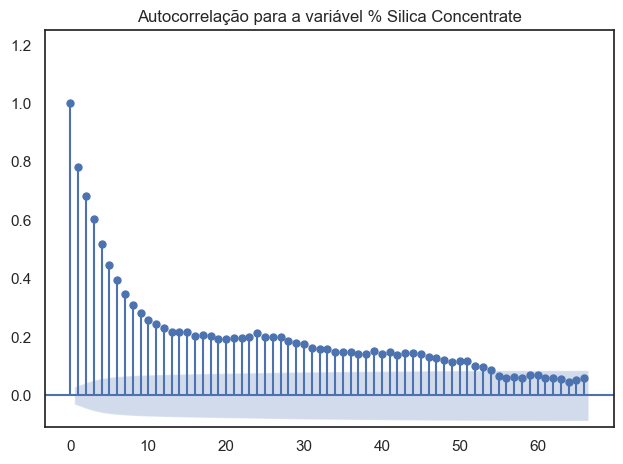

In [10]:
plot_acf(df['% Silica Concentrate'].values, lags=lags(df), alpha=0.05, title="Autocorrelação para a variável % Silica Concentrate", auto_ylims=True);

plt.tight_layout()
#plt.savefig("dados_ihm_stefanini/autocorrelacao_objetivo.png")

Pela análise gráfica, não é possível notar uma sazonalidade clara.